<a href="https://colab.research.google.com/github/Jittiya/multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exam pizza**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
from sklearn.decomposition import PCA

# insert data

In [6]:
dataex = pd.read_csv('/content/Pizza.csv')

In [7]:
dataex

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [13]:
dataex.shape

(300, 9)

In [12]:
dataex.head(10)

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,A,14082,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,A,14097,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,A,14117,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,A,14133,27.72,21.19,45.29,5.16,1.66,0.64,4.95


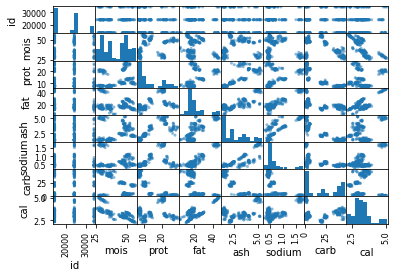

In [9]:
pd.plotting.scatter_matrix(dataex); 
## plot กราฟ

In [11]:
## check matrix 
dataex_matrix = np.array(dataex.iloc[:,-6:])
dataex_matrix

array([[21.43, 44.87,  5.11,  1.77,  0.77,  4.93],
       [21.26, 43.89,  5.34,  1.79,  1.02,  4.84],
       [19.99, 45.78,  5.08,  1.63,  0.8 ,  4.95],
       ...,
       [11.01, 16.03,  2.43,  0.64, 25.98,  2.92],
       [10.43, 15.18,  2.32,  0.56, 24.47,  2.76],
       [ 9.91, 15.5 ,  2.27,  0.57, 25.48,  2.81]])

In [15]:
newdataex = dataex.iloc[:,2:]
newdataex.head()

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67


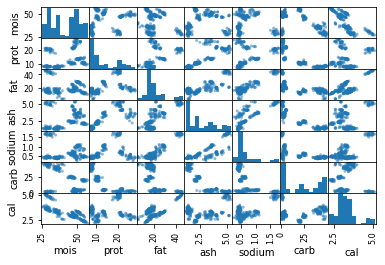

In [18]:
pd.plotting.scatter_matrix(newdataex); 

check correlation ของ columns

In [16]:
corr = np.corrcoef(newdataex.to_numpy().T)
corr.shape

(7, 7)

In [17]:
corr

array([[ 1.        ,  0.36024768, -0.17131821,  0.26555552, -0.1022789 ,
        -0.59180165, -0.76444054],
       [ 0.36024768,  1.        ,  0.49800167,  0.8238437 ,  0.42912952,
        -0.85354226,  0.0702581 ],
       [-0.17131821,  0.49800167,  1.        ,  0.79163396,  0.93332522,
        -0.64023817,  0.7645671 ],
       [ 0.26555552,  0.8238437 ,  0.79163396,  1.        ,  0.80812215,
        -0.89898837,  0.32646845],
       [-0.1022789 ,  0.42912952,  0.93332522,  0.80812215,  1.        ,
        -0.62017634,  0.6719575 ],
       [-0.59180165, -0.85354226, -0.64023817, -0.89898837, -0.62017634,
         1.        , -0.02348458],
       [-0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,  0.6719575 ,
        -0.02348458,  1.        ]])

In [23]:
for i in range(corr.shape[0]) :
        for j in range(corr.shape[1]) :
             if ( i !=j ) and (corr[i,j] ==1.) :
                 print(f'row = {i} column = {j} corrcoef = {corr[i,j]} ')

## ไม่มีค่าซ้ำกัน สร้างตารางใหม่

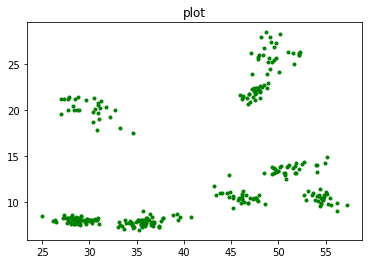

In [22]:
plt.plot(newdataex.iloc[:,0], newdataex.iloc[:,1], 'g.' );
plt.title('plot');